In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

In [3]:
df = pd.read_excel('data.xlsx')
orginal_gene_expression = np.array(df)

In [39]:
t = np.linspace(0,300,16) #number of time points
n = 5 # number of genes 
CR = 0.5
F = 0.02

In [5]:
#generating Random Number in the bounds

def rand(l,h,shape):
    return(np.random.uniform(low=l, high=h, size=shape))

In [6]:
#mutation function 
def mutation(l,h,i):
    
    r1 = rand(l,h,i.shape)
    r2 = rand(l,h,i.shape)
    r3 = rand(l,h,i.shape)
    return(r1+F*(r2-r3))

In [7]:
#crossover function

def crossover(g_mutant,g_target):
    
    temp = np.empty(g_target.shape)
    j_rand = np.random.randint(0,len(g_target))
    j = rand(0,1,g_target.shape)
    i = 0
    for x,y,z,t in zip(np.nditer(j),np.nditer(g_mutant),np.nditer(g_target),np.nditer(temp)):
        if(x<=CR or x==j_rand):
            t =y
        elif(x>CR and x!=j_rand):
            t =z
    
    return(temp)       
            
            
            

In [8]:
#calculating numerical gene expression 

def define_equation(A,B,g,h,Y):
    
    dydt = A*(np.prod(np.power(Y,g)))-B*(np.prod(np.power(Y,h)))

    return dydt


def get_dydt(ln):
    CalcGenes = []
    for j in range(n):
        temp = []
        for i in range(len(orginal_gene_expression)):
            temp.append(define_equation(ln['A'][j],ln['B'][j],ln['g'][j],ln['h'][j],orginal_gene_expression[i]))
        CalcGenes.append(temp)
    return(CalcGenes)

In [9]:
#Initialization of the population

def random_population():
    learning_parameters = {'A': np.random.uniform(low=0, high=20, size=(n,)), 
                           'B': np.random.uniform(low=0, high=20, size=(n,)), 
                           'g': np.random.uniform(low=-3, high=3, size=(n,n)),
                           'h': np.random.uniform(low=-3, high=3, size=(n,n))}
    return learning_parameters

In [10]:
#selecting the best generation

def selection(fitness_new, fitness_old,g_new,g_old):
    #we assume that old generation is the best
    g_temp = g_old
 
    for i in range(len(fitness_new)):
       
        if(fitness_new[i]<fitness_old[i]):
            g_temp['A'][i]=g_new['A'][i]
            g_temp['B'][i]=g_new['B'][i]
            g_temp['g'][i]=g_new['g'][i]
            g_temp['h'][i]=g_new['h'][i]

    return(g_temp)

In [11]:

#calcualting fitness CG: Calculated Genes RG: Real Genes

def fitness(CG,RG):
    fit = ((CG-RG)/RG)**2
    return(np.sum(fit, axis=0))    

In [12]:
#Making the next generation 

def next_generation(g):
    #calling mutation
    g_mutant = dict()
    g_mutant['A']=mutation(0,20,g['A'])
    g_mutant['B']=mutation(0,20,g['B'])
    g_mutant['g']=mutation(-3,3,g['g'])
    g_mutant['h']=mutation(-3,3,g['h'])
    #calling crossover
    g_trial = dict()
    g_trial['A'] = crossover(g_mutant['A'],g['A'])
    g_trial['B'] = crossover(g_mutant['B'],g['B'])
    g_trial['g'] = crossover(g_mutant['g'],g['g'])
    g_trial['h'] = crossover(g_mutant['h'],g['h'])
            
    return(g_trial)

In [13]:
#Save the new generation parameters, calculated gene expression and fitness function 

def save_values(l):
    curr_len = len(all_values)
    all_values[curr_len]=l
    

def get_full_set(g):
    
    #get the gene expressions
    exp = np.transpose(get_dydt(g))
    #get fitness function 
    fit = fitness(exp,orginal_gene_expression)
    
    #return function, fitness and gene expression
    return([g,exp,fit])
    

In [27]:
#Main method running all the operations 

G=0
g = random_population()
all_values = dict()
start = time.time()
best_low=[1,1,np.array([16,16,16,16,16])]#initializing the worst fitness

while(any(best_low[2]>1)):#running the loop until the sum of fitness is lower than 6
    
    #Saving expression and fitness for respective generation
    save_values(get_full_set(g))
    
    #getting the next generation
    new_g = next_generation(g)
    
    #getting the expression and fitness for next generation 
    full_set = get_full_set(new_g)
    
    best_low = all_values[len(all_values)-1]
    
    #selection the btetter generation
    g = selection(full_set[2], best_low[2],full_set[0],best_low[0])    
    
    #printing the generation and fitness value whenever it changes
    if(len(all_values)>1):
        old_fitness = all_values[len(all_values)-2][2]
        new_fitness = all_values[len(all_values)-1][2]
        if(list(old_fitness)!=list(new_fitness)):
            print('Generation No:', len(all_values)+1) 
            print("Fitness:",new_fitness)   

            
#printing outcome            
total_time_taken = (time.time()-start)
G += len(all_values)
print('number of Generation:', G)
print('best_fitness:', best_low[2])
print('total time taken:', total_time_taken)

Generation No: 3
Fitness: [ 16.03357611  16.09781401  16.34864316  15.99274576 238.97044689]
Generation No: 5
Fitness: [ 15.98245479  16.09781401  16.34864316  15.99274576 238.97044689]
Generation No: 8
Fitness: [ 15.98245479  16.0068463   16.20967511  15.99274576 238.97044689]
Generation No: 10
Fitness: [15.85260184 16.0068463  16.00001653 15.99274576 16.60096967]
Generation No: 11
Fitness: [15.85260184 16.0068463  16.00001653 12.97045883 16.60096967]
Generation No: 12
Fitness: [15.85260184 16.0068463  15.89707146 12.97045883 16.60096967]
Generation No: 13
Fitness: [15.78644835 16.0068463  13.77105659 12.97045883 16.60096967]
Generation No: 14
Fitness: [15.78644835 15.59415777 13.77105659 12.97045883 16.00221281]
Generation No: 17
Fitness: [ 7.93463363 15.59415777 13.77105659 12.97045883 14.41921417]
Generation No: 18
Fitness: [ 7.93463363 13.92051217 13.77105659  7.1328739  14.41921417]
Generation No: 30
Fitness: [ 7.93463363 13.75678835 13.77105659  7.1328739  14.41921417]
Generatio

In [46]:
from datetime import date

today = date.today()

Text = str(today)+'\n'+'CR= '+str(CR)+'\n'+'F= '+str(F)+'\n'+'G='+str(G)+'\n'+'parameters'+'\n'+str(best_low[0])+'\n'+'calculated gene expreesions'+'\n'+str(best_low[1])+'\n'+'fitness function'+str(best_low[2])+'\n'+'time taken:'+str(total_time_taken/60)+' inutes'


fileName = "Results"+str(today)
with open(fileName, 'w') as out_file:
    out_file.write(Text)   


In [47]:
final_gene_expression = best_low[1]

In [48]:
#plotting 

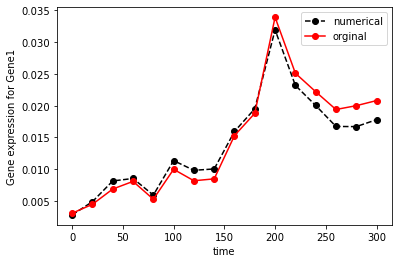

In [50]:
plt.plot(t, final_gene_expression[:,0], marker='o', color='black', linestyle='dashed'  )
plt.plot(t, orginal_gene_expression[:,0], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene1')
plt.legend(('numerical','orginal'))
plt.show()

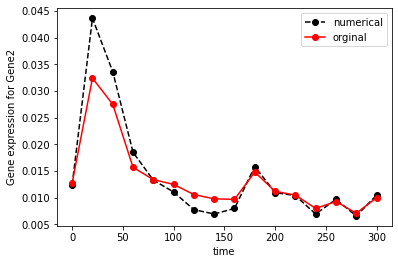

In [51]:
plt.plot(t, final_gene_expression[:,1], marker = 'o', color='black', linestyle='dashed')
plt.plot(t, orginal_gene_expression[:,1], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene2')
plt.legend(('numerical','orginal'))
plt.show()

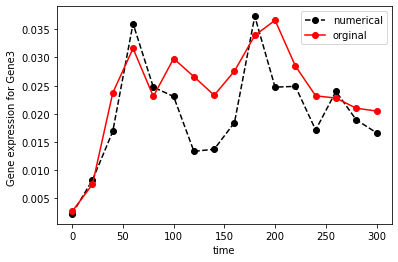

In [52]:
plt.plot(t, final_gene_expression[:,2], marker='o', color='black', linestyle='dashed' )
plt.plot(t, orginal_gene_expression[:,2], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene3 ')
plt.legend(('numerical','orginal'))
plt.show()

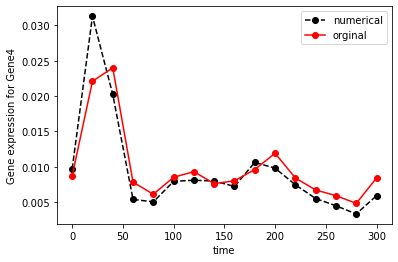

In [53]:
plt.plot(t, final_gene_expression[:,3],marker='o', color='black', linestyle='dashed')
plt.plot(t, orginal_gene_expression[:,3], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene4')
plt.legend(('numerical','orginal'))
plt.show()

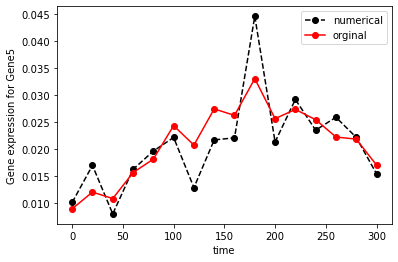

In [54]:
plt.plot(t, final_gene_expression[:,4], marker='o', color='black', linestyle='dashed')
plt.plot(t, orginal_gene_expression[:,4], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene5')
plt.legend(('numerical','orginal'))
plt.show()

bool